In [1]:
%matplotlib notebook
import torch
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import torchsparseattn

In [2]:
num_dims =100
x = np.array(list(range(num_dims)))
y = np.random.rand(len(x))

In [3]:
def test(x, t, **kwargs):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return 2*x + t
 
# set up plot
def create_vis(starmax, starmax_param_range):
    fig, (inp, out) = plt.subplots(1,2, figsize=(10, 4))
    

    @widgets.interact(**starmax_param_range)
    def update(**kwargs):
        """Remove old lines from plot and plot new one"""
        inp.clear()
        inp.bar(x, y)
        out.clear()
        out.bar(x, starmax(y, **kwargs))

<IPython.core.display.Javascript object>


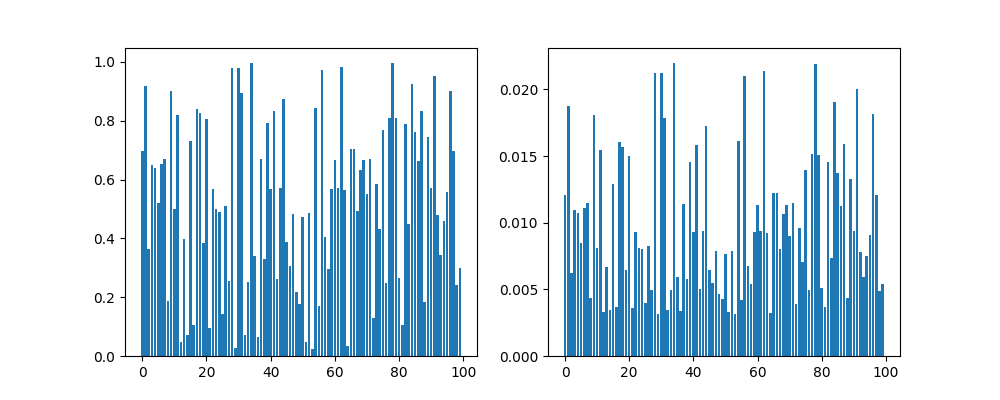

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, min=0.001, step=0.001), Output()), _dom…

In [4]:
# softmax with temp
def softmax(x, t):
    x = torch.tensor(x)
    return torch.nn.functional.softmax(x/t).numpy()

create_vis(softmax, dict(t=(0.001, 1, 0.001)))

<IPython.core.display.Javascript object>


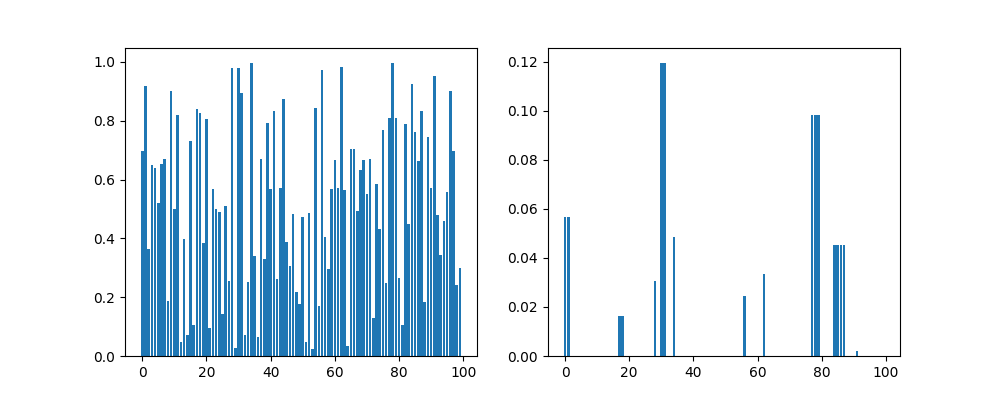

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0, step=0.001), Output()), _dom_classe…

In [5]:
def fusedmax(x, alpha):
    x = torch.tensor(x)
    fm = torchsparseattn.Fusedmax(alpha=alpha)
    return fm(x).numpy()
    
create_vis(fusedmax, dict(alpha=(0,1,0.001)))

<IPython.core.display.Javascript object>


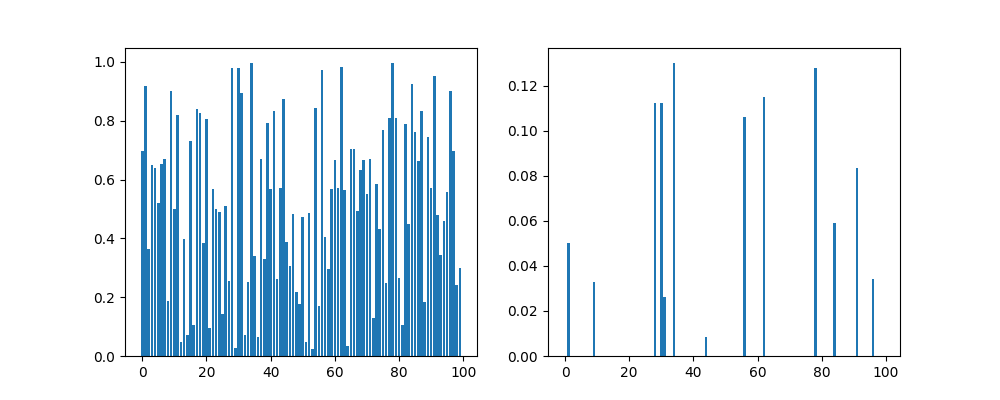

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [8]:
def sparsemax(x):
    x = torch.tensor(x)
    fm = torchsparseattn.Sparsemax()
    return fm(x).numpy()
    
create_vis(sparsemax, dict())